In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn import linear_model

### What is linear regression?

Linear Regression attempts to model the relationship between variables by fitting a linear equation, or more intuitively, a line/plane among observed data.

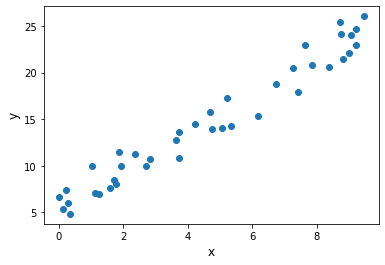

In [61]:
x = [10 * np.random.rand() for i in range(40)]
y = [2 * x[i] + 3 + 5 * np.random.rand() for i in range(40)]
plt.scatter(x, y)
plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.show()

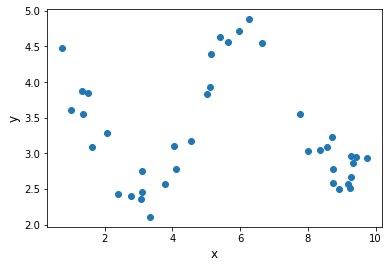

In [62]:
x = [10 * np.random.rand() for i in range(40)]
y = [np.cos(x[i]) + 3 + np.random.rand() for i in range(40)]
plt.scatter(x, y)
plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.show()

## Outline
*We use a simple and clean dataset to expain the basic process of MLR*
- Determine whether there exists linear relationship
- Fit the model (OLSE)
- Evaluate the model ($R^2$ and $adj-R^2$; t-test and F-test)

## Load Data

In [63]:
# Load 'hospital_infection.csv' dataset
df = pd.read_csv('hospital_infection.csv')
df.head()

,ID,Stay,Age,InfectionRate,Culture,Xray,Beds,MedSchool,Region,Census,Nurses,Facilities
0,5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0
1,10,8.84,56.3,6.3,29.6,82.6,85,2,1,59,66,40.0
2,11,11.07,53.2,4.9,28.5,122.0,768,1,1,591,656,80.0
3,13,12.78,56.8,7.7,46.0,116.9,322,1,1,252,349,57.1
4,18,11.62,53.9,6.4,25.5,99.2,133,2,1,113,101,37.1


## Define the questions we want to answer with linear regression

- ##### Can we predict the persons infection rate based on other patient statistics?

- ##### What statistics are the most significant predictors of infection rate?

## Visualising the Data

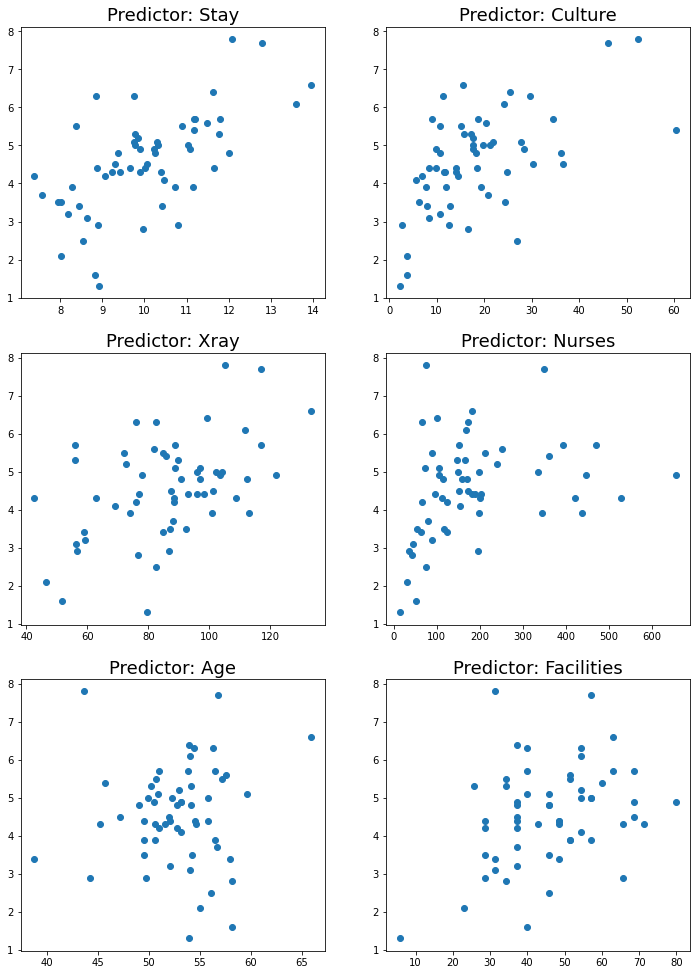

In [64]:
predictors = ['Stay', 'Culture', 'Xray', 'Nurses', 'Age', 'Facilities']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 17))
axes = axes.flatten()
for i, predictor in enumerate(predictors):
    axes[i].scatter(df[predictor], df['InfectionRate'])
    axes[i].set_title(f'Predictor: {predictor}', fontsize=18)
plt.show()

## Extract data into useable format

In [65]:
target = ['InfectionRate']
predictors = ['Stay', 'Culture', 'Xray', 'Census', 'Age', 'Facilities']

In [78]:
# The Target Variable Vector
y = df[target].values
print(y[:10])

[[5.7]
 [6.3]
 [4.9]
 [7.7]
 [6.4]
 [5. ]
 [4.5]
 [3.2]
 [4.4]
 [5. ]]


In [67]:
# The Predictor Variable Matrix
df[predictors].head(5)

,Stay,Culture,Xray,Census,Age,Facilities
0,11.20,34.5,88.9,134,56.5,40.0
1,8.84,29.6,82.6,59,56.3,40.0
2,11.07,28.5,122.0,591,53.2,80.0
3,12.78,46.0,116.9,252,56.8,57.1
4,11.62,25.5,99.2,113,53.9,37.1


In [79]:
# Add intercept column and extract values
data = df[predictors].copy()
data['Intercept'] = 1

X = np.roll(data.values, 1, axis=1)
print(X[:10])

[[  1.    11.2   34.5   88.9  134.    56.5   40.  ]
 [  1.     8.84  29.6   82.6   59.    56.3   40.  ]
 [  1.    11.07  28.5  122.   591.    53.2   80.  ]
 [  1.    12.78  46.   116.9  252.    56.8   57.1 ]
 [  1.    11.62  25.5   99.2  113.    53.9   37.1 ]
 [  1.     9.78  17.6   95.9  240.    52.3   57.1 ]
 [  1.     9.31  30.2  101.3  124.    47.2   37.1 ]
 [  1.     8.19  10.8   59.2  156.    52.1   37.1 ]
 [  1.    11.65  18.6   96.1  217.    54.5   37.1 ]
 [  1.    11.03  19.7  102.1  270.    49.9   57.1 ]]


## Fit the regression model

In [69]:
def get_predictor(coeff, intcpt):
    ''' Function to produce linear regression 
        inference function based on input 
        parameter values.'''
    def predictor(val):
        return val * coeff + intcpt
    return predictor

In [105]:
x_example = [10 * np.random.rand() for i in range(40)]
y_example = [2 * x_example[i] + 3 + 5 * np.random.rand() for i in range(40)]

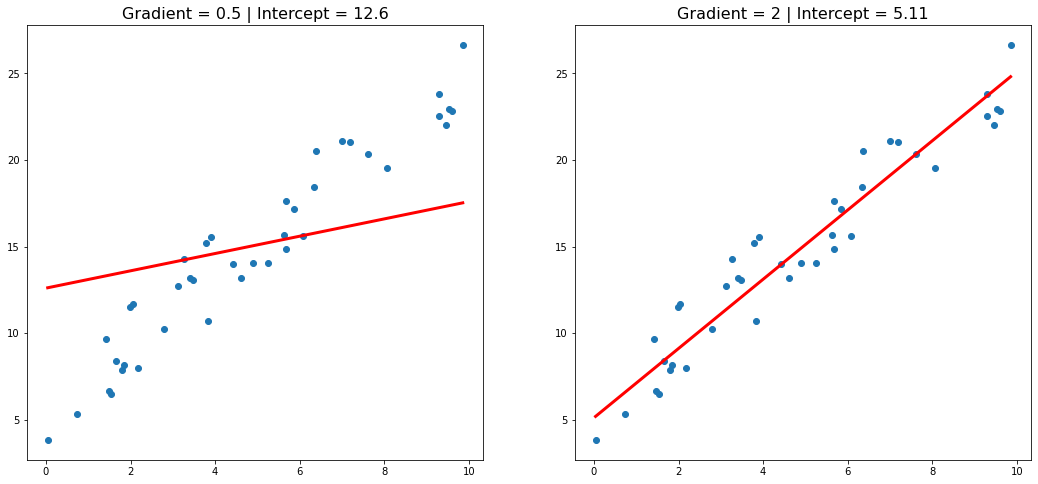

In [109]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 8))
axes = axes.flatten()

for i, (coeff, intcpt) in enumerate([[0.5, 12.6], [2, 5.11]]):
    predictor = get_predictor(coeff, intcpt)
    axes[i].scatter(x_example, y_example)
    axes[i].plot([min(x_example), max(x_example)],
                 [predictor(min(x_example)), predictor(max(x_example))],
                 'r', linewidth=3)
    axes[i].set_title(
        f"Gradient = {coeff} | Intercept = {intcpt}", fontsize=16)
plt.show()

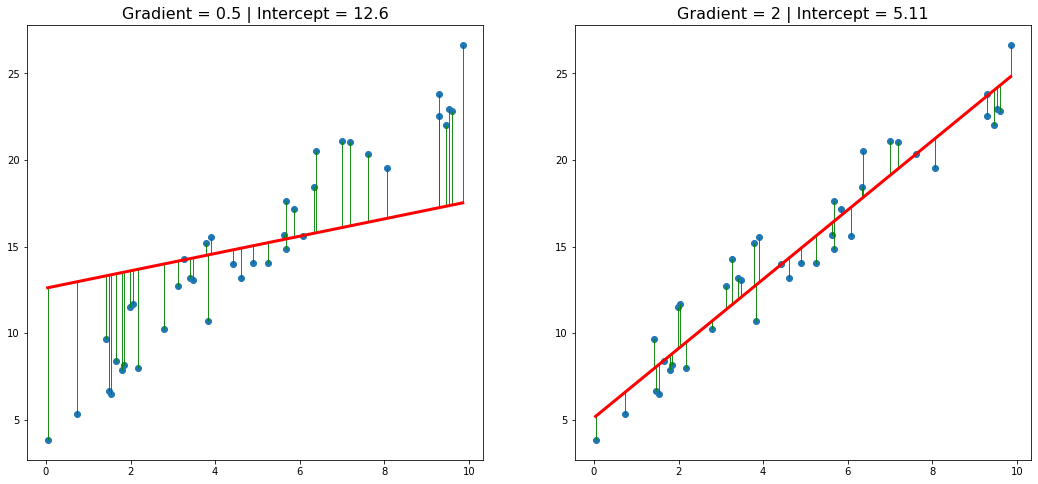

In [108]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 8))
axes = axes.flatten()

for i, (coeff, intcpt) in enumerate([[0.5, 12.6], [2, 5.11]]):
    predictor = get_predictor(coeff, intcpt)
    axes[i].scatter(x_example, y_example)
    axes[i].plot([min(x_example), max(x_example)],
                 [predictor(min(x_example)), predictor(max(x_example))],
                 'r', linewidth=3)
    axes[i].set_title(
        f"Gradient = {coeff} | Intercept = {intcpt}", fontsize=16)
    for x_val, y_val in zip(x_example, y_example):
        y_hat = predictor(x_val)
        y_min, y_max = min(y_val, y_hat), max(y_val, y_hat)
        axes[i].vlines(x_val, y_min, y_max, 'g', linewidth=0.9)
plt.show()

### Option 1: Compute optimum coefficients manually

Multiple Linear regression (MLR) is special in that we can compute the optimum coefficinet values directly from the data using the equation below

#### $\underline{\beta} = (\underline{\underline{X}}^T \cdot \underline{\underline{X}})^{-1} \cdot \underline{\underline{X}}^T \cdot \underline{y}$

In [80]:
# Compute the coefficient values
beta = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta)

[[-1.54481289e+00]
 [ 3.59375489e-01]
 [ 3.99143603e-02]
 [ 1.08565111e-02]
 [ 2.11723183e-04]
 [ 7.77180767e-03]
 [ 8.07368902e-03]]


### Option 2: Use the ```statsmodels``` library to perform regression

As with most complex tasks in Python, there is usually a Python package you can import that does the task using only a couple of lines of code. These libraries are usually faster and provide more functionality that if you were to implement it yourself. 

For linear regression, one package that is particularly useful is the ```statsmodels``` package. 

In [82]:
import statsmodels.formula.api as smf

In [83]:
model = smf.ols(
    'InfectionRate ~ Stay + Culture + Xray + Census + Age + Facilities', df).fit()

### Compare regession results

In [116]:
for name, beta_ceoff, smf_coeff in zip(model.params.index, beta, model.params.values):
    print(f'\033[1mPredictor: {name}\033[0m')
    print(f'Coefficient (Manually): {round(beta_ceoff[0], 5)}')
    print(f'Coefficient (Statsmodel): {round(smf_coeff, 5)}\n')

Predictor: Intercept
Coefficient (Manually): -1.54481
Coefficient (Statsmodel): -1.54481

Predictor: Stay
Coefficient (Manually): 0.35938
Coefficient (Statsmodel): 0.35938

Predictor: Culture
Coefficient (Manually): 0.03991
Coefficient (Statsmodel): 0.03991

Predictor: Xray
Coefficient (Manually): 0.01086
Coefficient (Statsmodel): 0.01086

Predictor: Census
Coefficient (Manually): 0.00021
Coefficient (Statsmodel): 0.00021

Predictor: Age
Coefficient (Manually): 0.00777
Coefficient (Statsmodel): 0.00777

Predictor: Facilities
Coefficient (Manually): 0.00807
Coefficient (Statsmodel): 0.00807



## Select model and  visualise Regression model

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          InfectionRate   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     11.17
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           6.39e-08
Time:                        23:02:09   Log-Likelihood:                -72.911
No. Observations:                  58   AIC:                             159.8
Df Residuals:                      51   BIC:                             174.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5448      1.630     -0.948      0.348      -4.817       1.727
Stay           0.3594      0.109      3.307      0.002       0.141       0.578
Culture        0.0399      0.012      3.428      0.001       0.017       0.063
Xray           0.0109      0.007      1.556      0.126      -0.003       0.025
Census         0.0002      0.001      0.150      0.881      -0.003       0.003
Age            0.0078      0.030      0.258      0.797      -0.053       0.068
Facilities     0.0081      0.014      0.587      0.560      -0.020       0.036
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.035
Skew:                           0.049   Prob(JB):                        0.983
Kurtosis:                       3.067   Cond. No.                     3.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Visualising the Final Model

In [112]:
margin = 0
reg = linear_model.LinearRegression()
Y = df.InfectionRate
X = df[['Stay', 'Culture']]
reg.fit(X.values, Y)
mesh_size = .02
x_min, x_max = X.Stay.min() - margin, X.Stay.max() + margin
y_min, y_max = X.Culture.min() - margin, X.Culture.max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)
pred = reg.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)